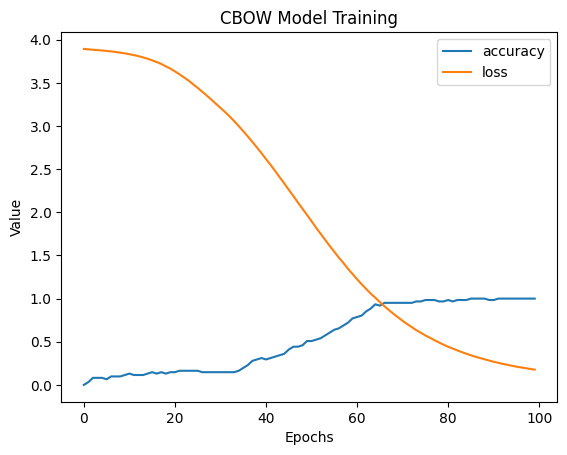


Word Embeddings:

[[ 1.20495670e-02 -1.94499977e-02  3.31001543e-02 -3.43024284e-02
   6.60115480e-03  3.39536704e-02  4.32803370e-02 -3.94020788e-02
  -1.58630498e-02 -4.49691787e-02 -6.15608692e-03 -3.54342349e-02
  -3.51146460e-02  3.57933156e-02  1.15836635e-02 -2.34527346e-02
   4.76647541e-03  1.94365121e-02 -2.42520329e-02  2.75510550e-03]
 [-2.06648275e-01 -1.30548328e-01  1.78124309e-02  1.52397424e-01
   1.35970026e-01 -2.84845442e-01 -2.83516198e-01  4.48974252e-01
   1.75560474e-01  1.27866104e-01  1.54534057e-01  1.97101727e-01
  -3.92594449e-02  3.78657997e-01 -1.90225482e-01  2.56885648e-01
   1.91481724e-01  1.28930146e-02  4.20641750e-01 -3.21858376e-01]
 [ 6.74246103e-02 -1.17140405e-01 -3.07417929e-01 -1.47645459e-01
  -3.06636188e-02  3.81467156e-02 -2.26941511e-01 -3.41481790e-02
   2.13439792e-01 -9.02251229e-02 -2.99714953e-01  2.59298623e-01
   4.64987934e-01  1.54025629e-01 -1.58907354e-01 -7.71296546e-02
   2.50722021e-01  2.07140177e-01  6.52316734e-02 -4.13

In [2]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
import matplotlib.pyplot as plt

# -----------------------------
# 2. Data Preprocessing
# -----------------------------
data = """The speed of transmission is an important point of difference between the two viruses.
Influenza has a shorter median incubation period the time from infection to appearance of symptoms
and a shorter serial interval the time between successive cases than COVID 19 virus.
The serial interval for COVID 19 virus is estimated to be 5 6 days while for influenza virus
the serial interval is 3 days. This means that influenza can spread faster than COVID-19."""

# with open("data.txt", "r", encoding="utf-8") as file:
#     data = file.read()

sentences = data.lower().split('.')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# -----------------------------
# 3. Create Training Data (Context → Target)
# -----------------------------
context_size = 2
contexts, targets = [], []

for seq in sequences:
    for i in range(context_size, len(seq) - context_size):
        target = seq[i]
        context = [seq[i - 2], seq[i - 1], seq[i + 1], seq[i + 2]]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
Y = np.array(targets)

# -----------------------------
# 4. Build Model
# -----------------------------
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=20, input_length=4),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# 5. Train Model
# -----------------------------
history = model.fit(X, Y, epochs=100, verbose=0)

# -----------------------------
# 6. Plot Accuracy & Loss
# -----------------------------
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title("CBOW Model Training")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()

# -----------------------------
# 7. Display Word Embeddings
# -----------------------------
embeddings = model.layers[0].get_weights()[0]
print("\nWord Embeddings:\n")
print(embeddings)